In [2]:
from spectral_cube import SpectralCube
#from pvextractor import extract_pv_slice, Path
#import pylab as pl
import numpy as np
from astropy.visualization import quantity_support
from astropy import units as u
from astropy import wcs
#from matplotlib.colors import LogNorm
#from astropy.visualization.stretch import SinhStretch
#from astropy.visualization import simple_norm
import matplotlib.pyplot as plt
from astropy.utils import data
from reproject import reproject_exact
from astropy.io import fits
from reproject.mosaicking import find_optimal_celestial_wcs

fatal: detected dubious ownership in repository at '/blue/adamginsburg/adamginsburg/repos/dask'
To add an exception for this directory, call:

	git config --global --add safe.directory /blue/adamginsburg/adamginsburg/repos/dask


In [3]:
combo_fixednames = [
    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.12CO.spw17.fits',
    'lol',
    #'/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.CH3OH.spw21.fits',
    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.CH3OH.masked.spw21.fits',
    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.H2CO.spw23.fits',
    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.H2CO.spw25.fits',
    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.SiO.spw27.fits',
    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.13CO.spw29.fits',
    '/orange/adamginsburg/cmz/g5/G5/sum/newcombination/galcorrected/g5.C18O.spw31.fits'
    ]

cube_17 = SpectralCube.read(combo_fixednames[0]).with_spectral_unit(u.km/u.s, velocity_convention='radio')
cube_21 = SpectralCube.read(combo_fixednames[2]).with_spectral_unit(u.km/u.s, velocity_convention='radio')
cube_23 = SpectralCube.read(combo_fixednames[3]).with_spectral_unit(u.km/u.s, velocity_convention='radio')
cube_25 = SpectralCube.read(combo_fixednames[4]).with_spectral_unit(u.km/u.s, velocity_convention='radio')
cube_27 = SpectralCube.read(combo_fixednames[5]).with_spectral_unit(u.km/u.s, velocity_convention='radio')
cube_29 = SpectralCube.read(combo_fixednames[6]).with_spectral_unit(u.km/u.s, velocity_convention='radio')
cube_31 = SpectralCube.read(combo_fixednames[7]).with_spectral_unit(u.km/u.s, velocity_convention='radio')

In [4]:
def noise_mask(cube, vmin, vmax, level):
    noise = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio').spectral_slab(vmin, vmax).std(axis=0)
    peak = cube.max(axis=0)
    spatial_mask = peak > level * noise
    return spatial_mask

def noise_mask_slab(cube, vmin, vmax, level, cut1, cut2):
    noise = cube.with_spectral_unit(u.km/u.s, velocity_convention='radio').spectral_slab(vmin, vmax).std(axis=0)
    peak = cube.spectral_slab(cut1, cut2).max(axis=0)
    spatial_mask = peak > level * noise
    return spatial_mask

In [5]:
cube_17.allow_huge_operations=True

In [6]:
mask_17 = noise_mask(cube_17, -100*u.km/u.second, -50 *u.km/u.second, 5)
mask_23 = noise_mask(cube_23, 180*u.km/u.second, 220 *u.km/u.second, 5)
mask_25 = noise_mask(cube_25, -100*u.km/u.second, -50 *u.km/u.second, 5)
mask_27 = noise_mask(cube_27, -100*u.km/u.second, -50 *u.km/u.second, 5)
mask_29 = noise_mask(cube_29, -100*u.km/u.second, -50 *u.km/u.second, 5)
mask_31 = noise_mask(cube_31, -100*u.km/u.second, -50 *u.km/u.second, 5)

/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:537: RuntimeWarning: All-NaN slice encountered
  result = function(np.dstack((result, plane)), axis=2, **kwargs)
/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,
/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, 

In [10]:
cube_17b = cube_17.spectral_slab(15*u.km / u.second, 75*u.km/u.second)
mask_17b = noise_mask_slab(cube_17, -100*u.km/u.second, -50 *u.km/u.second, 5, 15*u.km / u.second, 75*u.km/u.second)

cube_17a = cube_17.spectral_slab(75*u.km / u.second, 200*u.km/u.second)
mask_17a = noise_mask_slab(cube_17, -100*u.km/u.second, -50 *u.km/u.second, 5, 75*u.km / u.second, 200*u.km/u.second)

/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,
/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/numpy/lib/nanfunctions.py:1878: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


In [7]:
d = 7*u.kpc
m = 3*u.pc

ang = ((m / d)*u.radian).to(u.deg, equivalencies=u.dimensionless_angles())
ang

<Quantity 0.02455533 deg>

INFO: Auto-setting vmin to -8.657e+01 [aplpy.core]
INFO: Auto-setting vmax to  8.960e+02 [aplpy.core]
INFO: Auto-setting vmin to -5.375e+01 [aplpy.core]
INFO: Auto-setting vmax to  8.962e+02 [aplpy.core]


/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute size. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


INFO: Auto-setting resolution to 37.2333 dpi [aplpy.core]


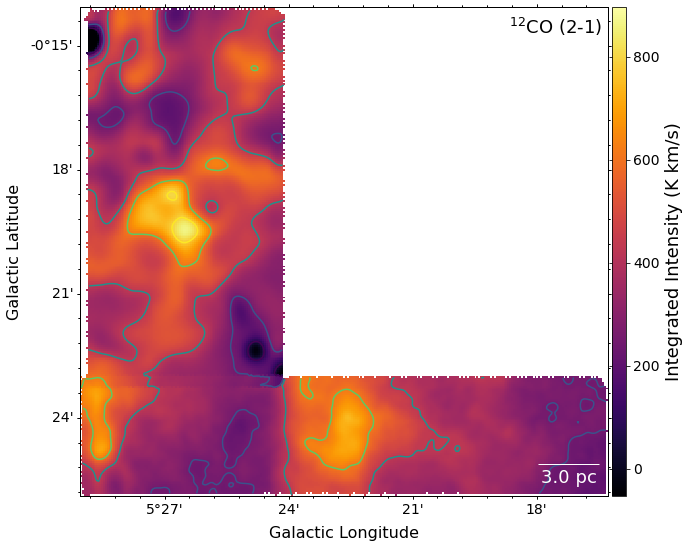

In [8]:
cube17_0 = cube_17.with_mask(mask_17).moment0()
cube17_0.quicklook()
cube17_0.FITSFigure.show_colorscale(cmap='inferno')
cube17_0.FITSFigure.colorbar.set_axis_label_text('Integrated Intensity (K km/s)')
cube17_0.FITSFigure.show_contour(cube17_0.hdu, returnlevels=True)
cube17_0.FITSFigure.colorbar.set_axis_label_font(size=18)
cube17_0.FITSFigure.colorbar.set_font(size=14)
cube17_0.FITSFigure.axis_labels.set_font(size=16)
cube17_0.FITSFigure.tick_labels.set_font(size=14)
cube17_0.FITSFigure.add_label(0.9, 0.96, "$^{12}$CO (2-1)", relative=True, size=18)
cube17_0.FITSFigure.add_scalebar(ang, color='white', size=18)
cube17_0.FITSFigure.scalebar.set_label(m)
#cube17_0.FITSFigure.show_regions('/orange/adamginsburg/cmz/g5/code/g5-lowvelo.reg')
#cube17_0.FITSFigure.show_regions('/orange/adamginsburg/cmz/g5/code/g5-highvelo.reg')
cube17_0.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom0_17-new.pdf')

/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:537: RuntimeWarning: All-NaN slice encountered
  result = function(np.dstack((result, plane)), axis=2, **kwargs)


INFO: Auto-setting vmin to  2.692e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.834e+01 [aplpy.core]
INFO: Auto-setting vmin to  2.575e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.833e+01 [aplpy.core]


/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute size. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


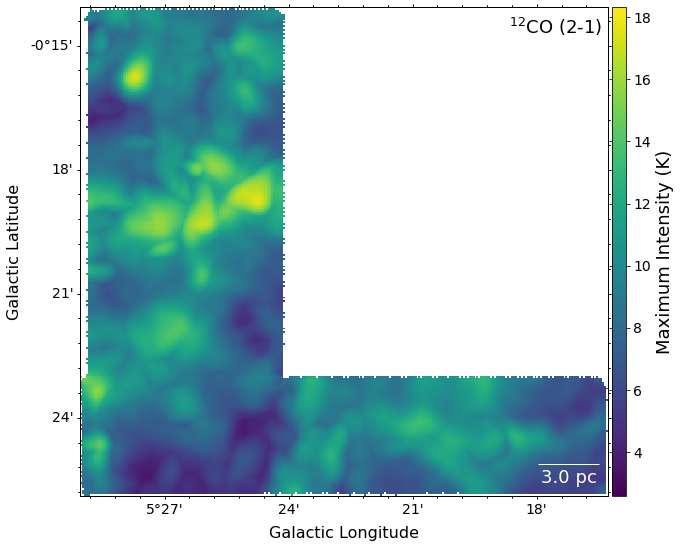

In [11]:
cube17_max = cube_17.with_mask(mask_17).max(axis=0)
cube17_max.quicklook()
cube17_max.FITSFigure.show_colorscale(cmap='viridis')
cube17_max.FITSFigure.colorbar.set_axis_label_text('Maximum Intensity (K)')
#cube17_max.FITSFigure.show_contour(cube17_0.hdu, returnlevels=True)
cube17_max.FITSFigure.colorbar.set_axis_label_font(size=18)
cube17_max.FITSFigure.colorbar.set_font(size=14)
cube17_max.FITSFigure.axis_labels.set_font(size=16)
cube17_max.FITSFigure.tick_labels.set_font(size=14)
cube17_max.FITSFigure.add_label(0.9, 0.96, "$^{12}$CO (2-1)", relative=True, size=18)
cube17_max.FITSFigure.add_scalebar(ang, color='white', size=18)
cube17_max.FITSFigure.scalebar.set_label(m)


/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/_moments.py:87: RuntimeWarning: invalid value encountered in divide
  return result / weights


INFO: Auto-setting vmin to  1.565e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.384e+02 [aplpy.core]
INFO: Auto-setting vmin to  1.446e+01 [aplpy.core]
INFO: Auto-setting vmax to  1.460e+02 [aplpy.core]


/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute size. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


INFO: Auto-setting resolution to 37.2333 dpi [aplpy.core]


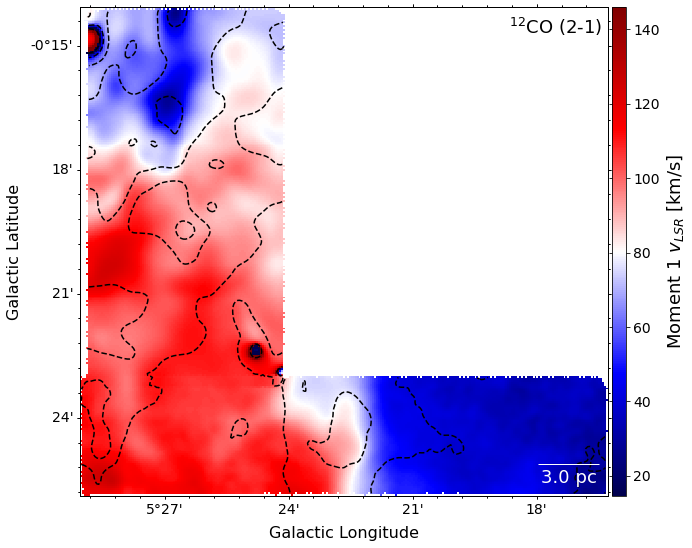

In [9]:
cube17_1 = cube_17.with_mask(mask_17).moment1()
cube17_1.quicklook()
cube17_1.FITSFigure.show_colorscale(cmap='seismic')
cube17_1.FITSFigure.colorbar.set_axis_label_text('Moment 1 $v_{LSR}$ [km/s]')
cube17_1.FITSFigure.show_contour(cube17_0.hdu, returnlevels=True, linestyles='dashed', colors='black')
cube17_1.FITSFigure.colorbar.set_axis_label_font(size=18)
cube17_1.FITSFigure.colorbar.set_font(size=14)
cube17_1.FITSFigure.axis_labels.set_font(size=16)
cube17_1.FITSFigure.tick_labels.set_font(size=14)
cube17_1.FITSFigure.add_label(0.9, 0.96, "$^{12}$CO (2-1)", relative=True, size=18)
cube17_1.FITSFigure.add_scalebar(ang, color='white', size=18)
cube17_1.FITSFigure.scalebar.set_label(m)
cube17_1.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom1_17-new.pdf')

INFO: Auto-setting vmin to  3.918e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.622e+02 [aplpy.core]
INFO: Auto-setting vmin to  6.713e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.582e+02 [aplpy.core]


/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute size. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


INFO: Auto-setting resolution to 37.2333 dpi [aplpy.core]


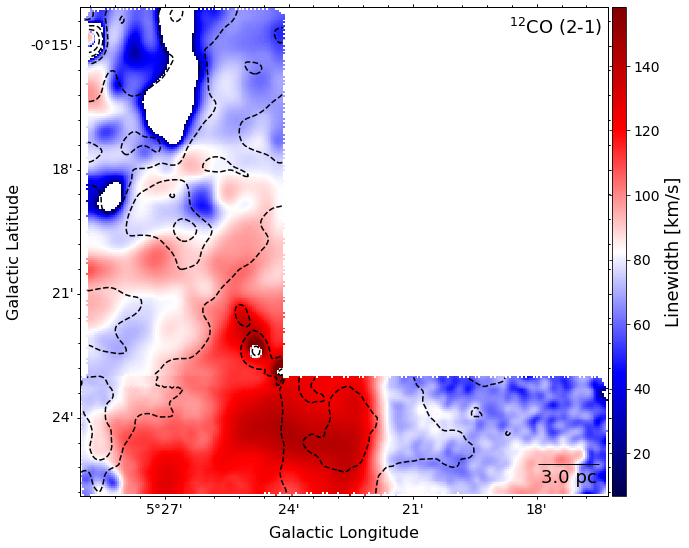

In [10]:
cube17_2 = cube_17.with_mask(mask_17).linewidth_fwhm()
cube17_2.quicklook()
cube17_2.FITSFigure.show_colorscale(cmap='seismic')
cube17_2.FITSFigure.colorbar.set_axis_label_text('Linewidth [km/s]')
cube17_2.FITSFigure.show_contour(cube17_0.hdu, returnlevels=True, linestyles='dashed', colors='black')
cube17_2.FITSFigure.colorbar.set_axis_label_font(size=18)
cube17_2.FITSFigure.colorbar.set_font(size=14)
cube17_2.FITSFigure.axis_labels.set_font(size=16)
cube17_2.FITSFigure.tick_labels.set_font(size=14)
cube17_2.FITSFigure.add_label(0.9, 0.96, "$^{12}$CO (2-1)", relative=True, size=18)
cube17_2.FITSFigure.add_scalebar(ang, color='black', size=18)
cube17_2.FITSFigure.scalebar.set_label(m)
cube17_2.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom2_17-new.pdf')

INFO: Auto-setting vmin to -8.788e+01 [aplpy.core]
INFO: Auto-setting vmax to  7.110e+02 [aplpy.core]
INFO: Auto-setting vmin to -8.383e+01 [aplpy.core]
INFO: Auto-setting vmax to  7.114e+02 [aplpy.core]


/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute size. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


INFO: Auto-setting resolution to 37.2333 dpi [aplpy.core]


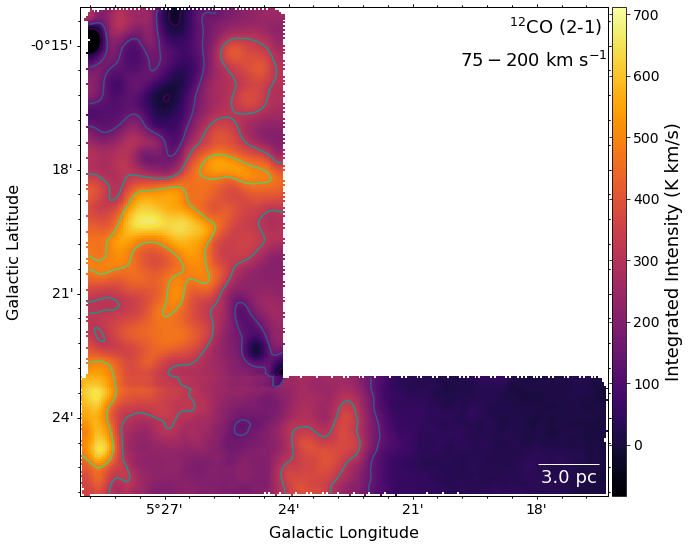

In [11]:
cube17a_0 = cube_17a.with_mask(mask_17a).moment0()
cube17a_0.quicklook()
cube17a_0.FITSFigure.show_colorscale(cmap='inferno')
cube17a_0.FITSFigure.colorbar.set_axis_label_text('Integrated Intensity (K km/s)')
cube17a_0.FITSFigure.show_contour(cube17a_0.hdu, returnlevels=True)
cube17a_0.FITSFigure.colorbar.set_axis_label_font(size=18)
cube17a_0.FITSFigure.colorbar.set_font(size=14)
cube17a_0.FITSFigure.axis_labels.set_font(size=16)
cube17a_0.FITSFigure.tick_labels.set_font(size=14)
cube17a_0.FITSFigure.add_label(0.9, 0.96, "$^{12}$CO (2-1)", relative=True, size=18)
cube17a_0.FITSFigure.add_label(0.86, 0.89, "$75-200$ km s$^{-1}$", relative=True, size=18)
cube17a_0.FITSFigure.add_scalebar(ang, color='white', size=18)
cube17a_0.FITSFigure.scalebar.set_label(m)
cube17a_0.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom0_G5a_17-new.pdf')

/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


INFO: Auto-setting vmin to -1.423e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.759e+01 [aplpy.core]
INFO: Auto-setting vmin to -1.394e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.764e+01 [aplpy.core]


/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute size. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


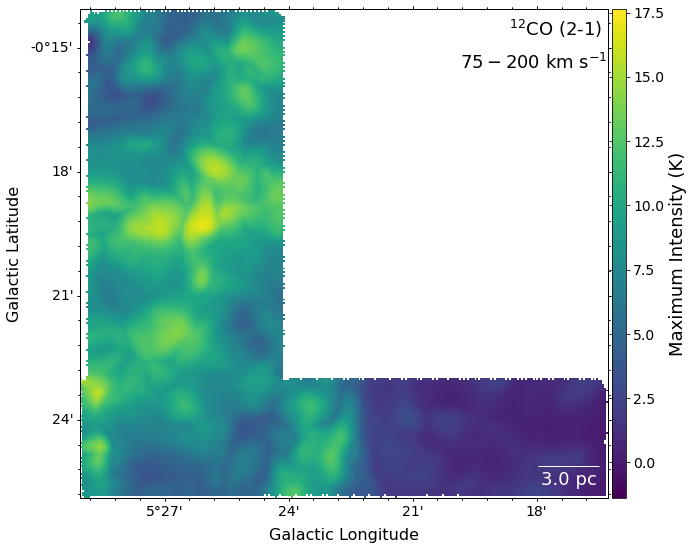

In [12]:
cube17a_max = cube_17a.with_mask(mask_17a).max(axis=0)
cube17a_max.quicklook()
cube17a_max.FITSFigure.show_colorscale(cmap='viridis')
cube17a_max.FITSFigure.colorbar.set_axis_label_text('Maximum Intensity (K)')
#cube17a_max.FITSFigure.show_contour(cube17a_0.hdu, returnlevels=True)
cube17a_max.FITSFigure.colorbar.set_axis_label_font(size=18)
cube17a_max.FITSFigure.colorbar.set_font(size=14)
cube17a_max.FITSFigure.axis_labels.set_font(size=16)
cube17a_max.FITSFigure.tick_labels.set_font(size=14)
cube17a_max.FITSFigure.add_label(0.9, 0.96, "$^{12}$CO (2-1)", relative=True, size=18)
cube17a_max.FITSFigure.add_label(0.86, 0.89, "$75-200$ km s$^{-1}$", relative=True, size=18)
cube17a_max.FITSFigure.add_scalebar(ang, color='white', size=18)
cube17a_max.FITSFigure.scalebar.set_label(m)
#cube17a_0.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom0_G5a_17-new.pdf')

INFO: Auto-setting vmin to -6.842e+01 [aplpy.core]
INFO: Auto-setting vmax to  4.558e+02 [aplpy.core]
INFO: Auto-setting vmin to -6.695e+01 [aplpy.core]
INFO: Auto-setting vmax to  4.500e+02 [aplpy.core]


/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute size. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


INFO: Auto-setting resolution to 37.2333 dpi [aplpy.core]


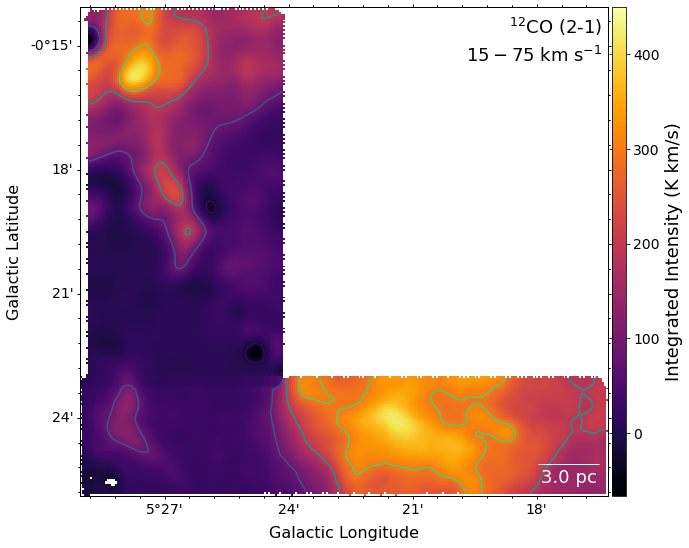

In [12]:
cube17b_0 = cube_17b.with_mask(mask_17b).moment0()
cube17b_0.quicklook()
cube17b_0.FITSFigure.show_colorscale(cmap='inferno')
cube17b_0.FITSFigure.colorbar.set_axis_label_text('Integrated Intensity (K km/s)')
cube17b_0.FITSFigure.show_contour(cube17b_0.hdu, returnlevels=True)
cube17b_0.FITSFigure.colorbar.set_axis_label_font(size=18)
cube17b_0.FITSFigure.colorbar.set_font(size=14)
cube17b_0.FITSFigure.axis_labels.set_font(size=16)
cube17b_0.FITSFigure.tick_labels.set_font(size=14)
cube17b_0.FITSFigure.add_label(0.9, 0.96, "$^{12}$CO (2-1)", relative=True, size=18)
cube17b_0.FITSFigure.add_label(0.86, 0.9, "$15-75$ km s$^{-1}$", relative=True, size=18)
cube17b_0.FITSFigure.add_scalebar(ang, color='white', size=18)
cube17b_0.FITSFigure.scalebar.set_label(m)
cube17b_0.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom0_G5b_17-new.pdf')

/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


INFO: Auto-setting vmin to -1.253e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.695e+01 [aplpy.core]
INFO: Auto-setting vmin to -1.175e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.599e+01 [aplpy.core]


/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute size. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


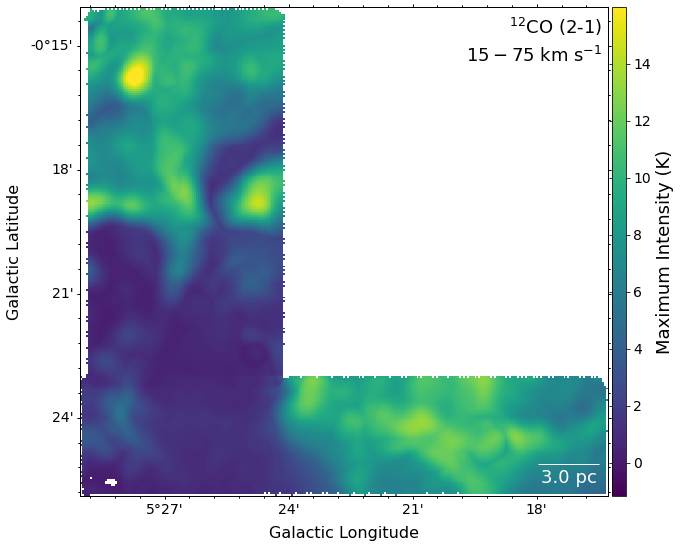

In [14]:
cube17b_max = cube_17b.with_mask(mask_17b).max(axis=0)
cube17b_max.quicklook()
cube17b_max.FITSFigure.show_colorscale(cmap='viridis')
cube17b_max.FITSFigure.colorbar.set_axis_label_text('Maximum Intensity (K)')
#cube17b_max.FITSFigure.show_contour(cube17b_0.hdu, returnlevels=True)
cube17b_max.FITSFigure.colorbar.set_axis_label_font(size=18)
cube17b_max.FITSFigure.colorbar.set_font(size=14)
cube17b_max.FITSFigure.axis_labels.set_font(size=16)
cube17b_max.FITSFigure.tick_labels.set_font(size=14)
cube17b_max.FITSFigure.add_label(0.9, 0.96, "$^{12}$CO (2-1)", relative=True, size=18)
cube17b_max.FITSFigure.add_label(0.86, 0.9, "$15-75$ km s$^{-1}$", relative=True, size=18)
cube17b_max.FITSFigure.add_scalebar(ang, color='white', size=18)
cube17b_max.FITSFigure.scalebar.set_label(m)
#cube17b_0.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom0_G5b_17-new.pdf')

INFO: Auto-setting vmin to -3.754e-01 [aplpy.core]
INFO: Auto-setting vmax to  2.197e+00 [aplpy.core]
INFO: Auto-setting vmin to -4.873e-01 [aplpy.core]
INFO: Auto-setting vmax to  2.279e+00 [aplpy.core]


/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute size. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


INFO: Auto-setting resolution to 35.3201 dpi [aplpy.core]


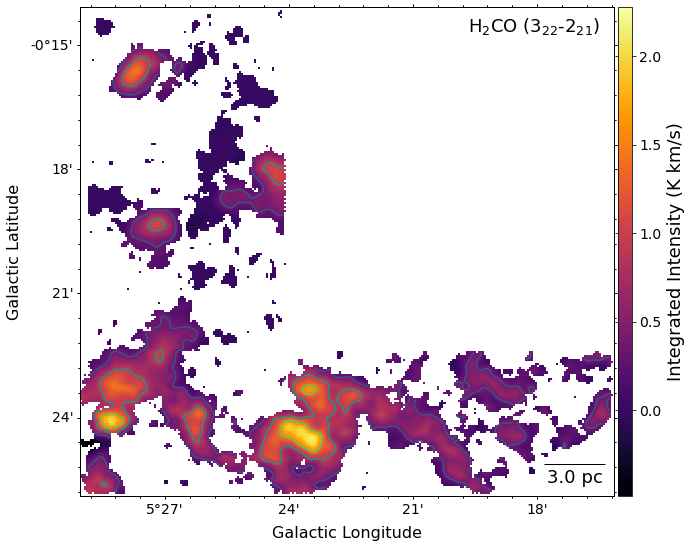

In [13]:
cube23_0 = cube_23.with_mask(mask_23).moment0()
cube23_0.quicklook()
cube23_0.FITSFigure.show_colorscale(cmap='inferno')
cube23_0.FITSFigure.colorbar.set_axis_label_text('Integrated Intensity (K km/s)')
cube23_0.FITSFigure.show_contour(cube23_0.hdu, returnlevels=True)
cube23_0.FITSFigure.colorbar.set_axis_label_font(size=18)
cube23_0.FITSFigure.colorbar.set_font(size=14)
cube23_0.FITSFigure.axis_labels.set_font(size=16)
cube23_0.FITSFigure.tick_labels.set_font(size=14)
cube23_0.FITSFigure.add_label(0.85, 0.96, "H$_2$CO (3$_{22}$-2$_{21}$)", relative=True, size=18)
cube23_0.FITSFigure.add_scalebar(ang, color='black', size=18)
cube23_0.FITSFigure.scalebar.set_label(m)
cube23_0.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom0_23-new.pdf')

/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


INFO: Auto-setting vmin to  6.579e-03 [aplpy.core]
INFO: Auto-setting vmax to  1.124e-01 [aplpy.core]
INFO: Auto-setting vmin to  6.734e-03 [aplpy.core]
INFO: Auto-setting vmax to  1.106e-01 [aplpy.core]


/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute size. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


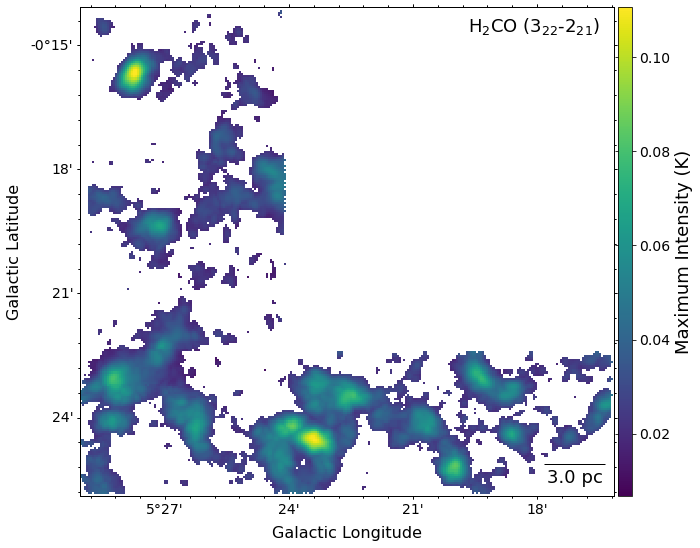

In [16]:
cube23_max = cube_23.with_mask(mask_23).max(axis=0)
cube23_max.quicklook()
cube23_max.FITSFigure.show_colorscale(cmap='viridis')
cube23_max.FITSFigure.colorbar.set_axis_label_text('Maximum Intensity (K)')
#cube23_max.FITSFigure.show_contour(cube23_0.hdu, returnlevels=True)
cube23_max.FITSFigure.colorbar.set_axis_label_font(size=18)
cube23_max.FITSFigure.colorbar.set_font(size=14)
cube23_max.FITSFigure.axis_labels.set_font(size=16)
cube23_max.FITSFigure.tick_labels.set_font(size=14)
cube23_max.FITSFigure.add_label(0.85, 0.96, "H$_2$CO (3$_{22}$-2$_{21}$)", relative=True, size=18)
cube23_max.FITSFigure.add_scalebar(ang, color='black', size=18)
cube23_max.FITSFigure.scalebar.set_label(m)
#cube23_0.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom0_23-new.pdf')

INFO: Auto-setting vmin to -1.761e+00 [aplpy.core]
INFO: Auto-setting vmax to  6.084e+00 [aplpy.core]
INFO: Auto-setting vmin to -1.767e+00 [aplpy.core]
INFO: Auto-setting vmax to  6.161e+00 [aplpy.core]


/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute size. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


INFO: Auto-setting resolution to 35.3201 dpi [aplpy.core]


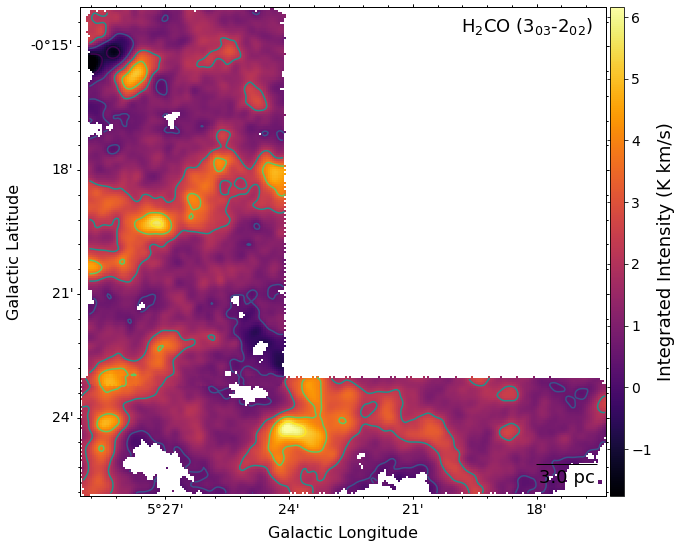

In [14]:
cube25_0 = cube_25.with_mask(mask_25).moment0()
cube25_0.quicklook()
cube25_0.FITSFigure.show_colorscale(cmap='inferno')
cube25_0.FITSFigure.colorbar.set_axis_label_text('Integrated Intensity (K km/s)')
cube25_0.FITSFigure.show_contour(cube25_0.hdu, returnlevels=True)
cube25_0.FITSFigure.colorbar.set_axis_label_font(size=18)
cube25_0.FITSFigure.colorbar.set_font(size=14)
cube25_0.FITSFigure.axis_labels.set_font(size=16)
cube25_0.FITSFigure.tick_labels.set_font(size=14)
cube25_0.FITSFigure.add_label(0.85, 0.96, "H$_2$CO (3$_{03}$-2$_{02}$)", relative=True, size=18)
cube25_0.FITSFigure.add_scalebar(ang, color='black', size=18)
cube25_0.FITSFigure.scalebar.set_label(m)
cube25_0.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom0_25-new.pdf')

/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


INFO: Auto-setting vmin to -5.648e-03 [aplpy.core]
INFO: Auto-setting vmax to  3.005e-01 [aplpy.core]
INFO: Auto-setting vmin to -4.820e-03 [aplpy.core]
INFO: Auto-setting vmax to  2.897e-01 [aplpy.core]


/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute size. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


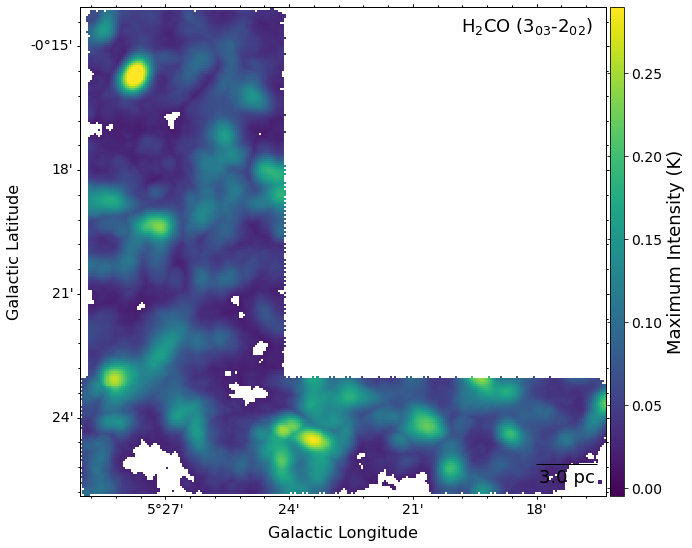

In [17]:
cube25_max = cube_25.with_mask(mask_25).max(axis=0)
cube25_max.quicklook()
cube25_max.FITSFigure.show_colorscale(cmap='viridis')
cube25_max.FITSFigure.colorbar.set_axis_label_text('Maximum Intensity (K)')
#cube25_max.FITSFigure.show_contour(cube25_0.hdu, returnlevels=True)
cube25_max.FITSFigure.colorbar.set_axis_label_font(size=18)
cube25_max.FITSFigure.colorbar.set_font(size=14)
cube25_max.FITSFigure.axis_labels.set_font(size=16)
cube25_max.FITSFigure.tick_labels.set_font(size=14)
cube25_max.FITSFigure.add_label(0.85, 0.96, "H$_2$CO (3$_{03}$-2$_{02}$)", relative=True, size=18)
cube25_max.FITSFigure.add_scalebar(ang, color='black', size=18)
cube25_max.FITSFigure.scalebar.set_label(m)
#cube25_0.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom0_25-new.pdf')

INFO: Auto-setting vmin to -7.166e-01 [aplpy.core]
INFO: Auto-setting vmax to  4.290e+00 [aplpy.core]
INFO: Auto-setting vmin to -7.334e-01 [aplpy.core]
INFO: Auto-setting vmax to  4.669e+00 [aplpy.core]


/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute size. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


INFO: Auto-setting resolution to 35.0258 dpi [aplpy.core]


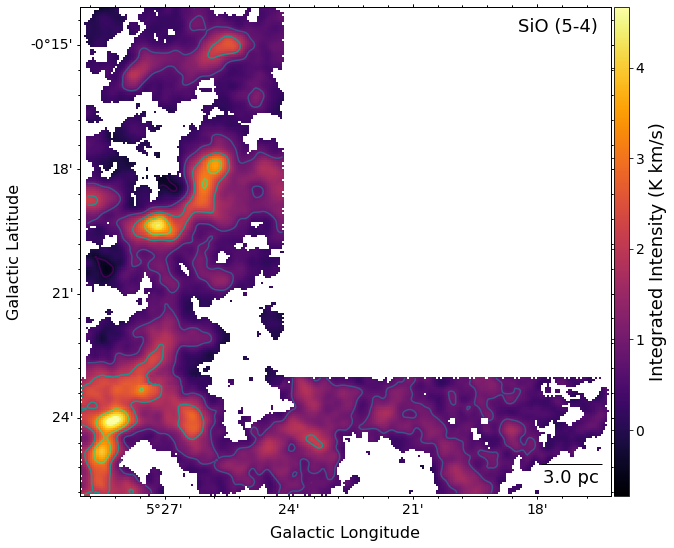

In [15]:
cube27_0 = cube_27.with_mask(mask_27).moment0()
cube27_0.quicklook()
cube27_0.FITSFigure.show_colorscale(cmap='inferno')
cube27_0.FITSFigure.colorbar.set_axis_label_text('Integrated Intensity (K km/s)')
cube27_0.FITSFigure.show_contour(cube27_0.hdu, returnlevels=True)
cube27_0.FITSFigure.colorbar.set_axis_label_font(size=18)
cube27_0.FITSFigure.colorbar.set_font(size=14)
cube27_0.FITSFigure.axis_labels.set_font(size=16)
cube27_0.FITSFigure.tick_labels.set_font(size=14)
cube27_0.FITSFigure.add_label(0.9, 0.96, "SiO (5-4)", relative=True, size=18)
cube27_0.FITSFigure.add_scalebar(ang, color='black', size=18)
cube27_0.FITSFigure.scalebar.set_label(m)
cube27_0.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom0_27-new.pdf')

/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


INFO: Auto-setting vmin to -3.137e-04 [aplpy.core]
INFO: Auto-setting vmax to  2.177e-01 [aplpy.core]
INFO: Auto-setting vmin to -9.025e-04 [aplpy.core]
INFO: Auto-setting vmax to  2.197e-01 [aplpy.core]


/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute size. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


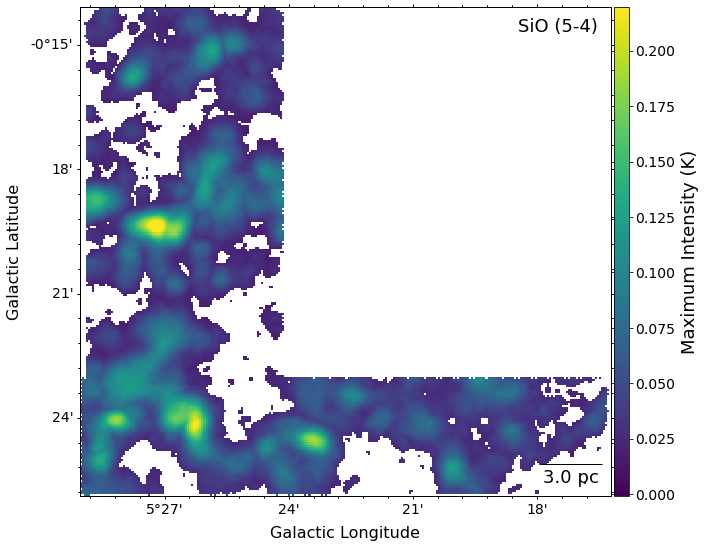

In [18]:
cube27_max = cube_27.with_mask(mask_27).max(axis=0)
cube27_max.quicklook()
cube27_max.FITSFigure.show_colorscale(cmap='viridis')
cube27_max.FITSFigure.colorbar.set_axis_label_text('Maximum Intensity (K)')
#cube27_max.FITSFigure.show_contour(cube27_0.hdu, returnlevels=True)
cube27_max.FITSFigure.colorbar.set_axis_label_font(size=18)
cube27_max.FITSFigure.colorbar.set_font(size=14)
cube27_max.FITSFigure.axis_labels.set_font(size=16)
cube27_max.FITSFigure.tick_labels.set_font(size=14)
cube27_max.FITSFigure.add_label(0.9, 0.96, "SiO (5-4)", relative=True, size=18)
cube27_max.FITSFigure.add_scalebar(ang, color='black', size=18)
cube27_max.FITSFigure.scalebar.set_label(m)
#cube27_0.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom0_27-new.pdf')

INFO: Auto-setting vmin to -6.781e+00 [aplpy.core]
INFO: Auto-setting vmax to  6.709e+01 [aplpy.core]
INFO: Auto-setting vmin to -6.014e+00 [aplpy.core]
INFO: Auto-setting vmax to  6.635e+01 [aplpy.core]


/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute size. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


INFO: Auto-setting resolution to 35.6144 dpi [aplpy.core]


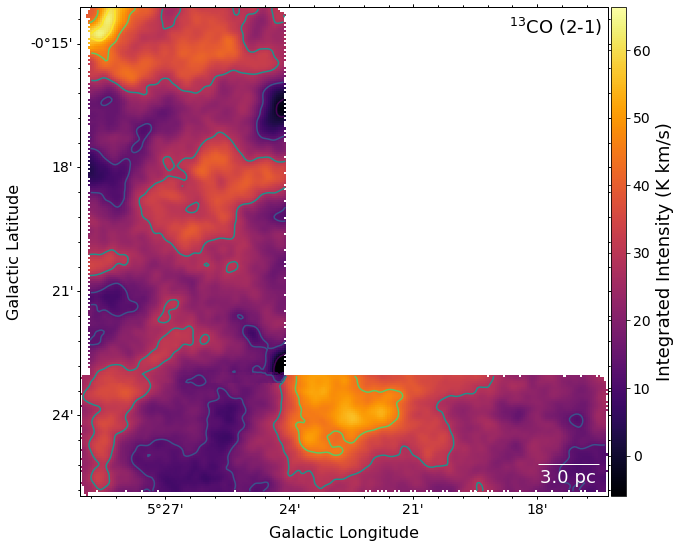

In [16]:
cube29_0 = cube_29.with_mask(mask_29).moment0()
cube29_0.quicklook()
cube29_0.FITSFigure.show_colorscale(cmap='inferno')
cube29_0.FITSFigure.colorbar.set_axis_label_text('Integrated Intensity (K km/s)')
cube29_0.FITSFigure.show_contour(cube29_0.hdu, returnlevels=True)
cube29_0.FITSFigure.colorbar.set_axis_label_font(size=18)
cube29_0.FITSFigure.colorbar.set_font(size=14)
cube29_0.FITSFigure.axis_labels.set_font(size=16)
cube29_0.FITSFigure.tick_labels.set_font(size=14)
cube29_0.FITSFigure.add_label(0.9, 0.96, "$^{13}$CO (2-1)", relative=True, size=18)
cube29_0.FITSFigure.add_scalebar(ang, color='white', size=18)
cube29_0.FITSFigure.scalebar.set_label(m)
cube29_0.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom0_29-new.pdf')

/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


INFO: Auto-setting vmin to -2.760e-01 [aplpy.core]
INFO: Auto-setting vmax to  6.815e+00 [aplpy.core]
INFO: Auto-setting vmin to -2.965e-01 [aplpy.core]
INFO: Auto-setting vmax to  6.906e+00 [aplpy.core]


/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute size. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


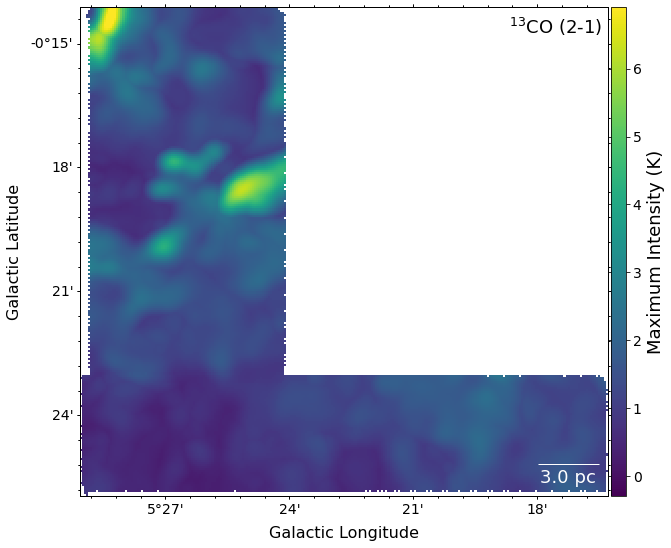

In [19]:
cube29_max = cube_29.with_mask(mask_29).max(axis=0)
cube29_max.quicklook()
cube29_max.FITSFigure.show_colorscale(cmap='viridis')
cube29_max.FITSFigure.colorbar.set_axis_label_text('Maximum Intensity (K)')
#cube29_max.FITSFigure.show_contour(cube29_0.hdu, returnlevels=True)
cube29_max.FITSFigure.colorbar.set_axis_label_font(size=18)
cube29_max.FITSFigure.colorbar.set_font(size=14)
cube29_max.FITSFigure.axis_labels.set_font(size=16)
cube29_max.FITSFigure.tick_labels.set_font(size=14)
cube29_max.FITSFigure.add_label(0.9, 0.96, "$^{13}$CO (2-1)", relative=True, size=18)
cube29_max.FITSFigure.add_scalebar(ang, color='white', size=18)
cube29_max.FITSFigure.scalebar.set_label(m)
#cube29_0.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom0_29-new.pdf')

INFO: Auto-setting vmin to -1.075e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.091e+01 [aplpy.core]
INFO: Auto-setting vmin to -1.259e+00 [aplpy.core]
INFO: Auto-setting vmax to  1.077e+01 [aplpy.core]


/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute size. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


INFO: Auto-setting resolution to 35.4673 dpi [aplpy.core]


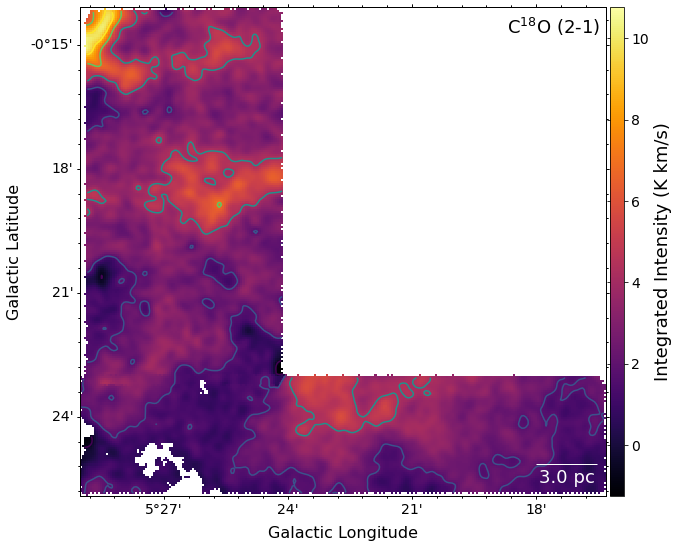

In [17]:
cube31_0 = cube_31.with_mask(mask_31).moment0()
cube31_0.quicklook()
cube31_0.FITSFigure.show_colorscale(cmap='inferno')
cube31_0.FITSFigure.colorbar.set_axis_label_text('Integrated Intensity (K km/s)')
cube31_0.FITSFigure.show_contour(cube31_0.hdu, returnlevels=True)
cube31_0.FITSFigure.colorbar.set_axis_label_font(size=18)
cube31_0.FITSFigure.colorbar.set_font(size=14)
cube31_0.FITSFigure.axis_labels.set_font(size=16)
cube31_0.FITSFigure.tick_labels.set_font(size=14)
cube31_0.FITSFigure.add_label(0.9, 0.96, "C$^{18}$O (2-1)", relative=True, size=18)
cube31_0.FITSFigure.add_scalebar(ang, color='white', size=18)
cube31_0.FITSFigure.scalebar.set_label(m)
cube31_0.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom0_31-new.pdf')

/blue/adamginsburg/adamginsburg/repos/spectral-cube/spectral_cube/spectral_cube.py:439: RuntimeWarning: All-NaN slice encountered
  out = function(self._get_filled_data(fill=fill,


INFO: Auto-setting vmin to -1.262e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.953e+00 [aplpy.core]
INFO: Auto-setting vmin to -1.300e-01 [aplpy.core]
INFO: Auto-setting vmax to  1.984e+00 [aplpy.core]


/orange/adamginsburg/miniconda3/envs/python39/lib/python3.9/site-packages/aplpy/overlays.py:272: UserWarning: Scalebar does not have attribute size. Skipping.
  warnings.warn("Scalebar does not have attribute {0}. Skipping.".format(kwarg))


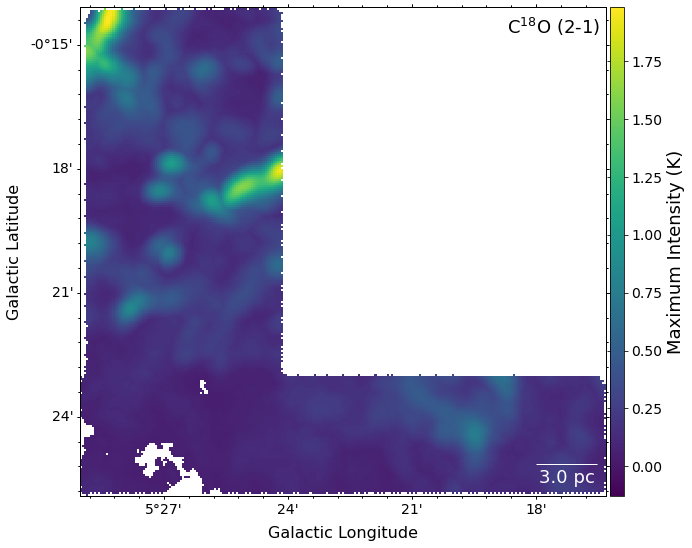

In [21]:
cube31_max = cube_31.with_mask(mask_31).max(axis=0)
cube31_max.quicklook()
cube31_max.FITSFigure.show_colorscale(cmap='viridis')
cube31_max.FITSFigure.colorbar.set_axis_label_text('Maximum Intensity (K)')
#cube31_max.FITSFigure.show_contour(cube31_0.hdu, returnlevels=True)
cube31_max.FITSFigure.colorbar.set_axis_label_font(size=18)
cube31_max.FITSFigure.colorbar.set_font(size=14)
cube31_max.FITSFigure.axis_labels.set_font(size=16)
cube31_max.FITSFigure.tick_labels.set_font(size=14)
cube31_max.FITSFigure.add_label(0.9, 0.96, "C$^{18}$O (2-1)", relative=True, size=18)
cube31_max.FITSFigure.add_scalebar(ang, color='white', size=18)
cube31_max.FITSFigure.scalebar.set_label(m)
#cube31_0.FITSFigure.savefig('/orange/adamginsburg/cmz/g5/code/plots/mom0_31-new.pdf')